In [52]:
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
from decimal import *
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [86]:
#getting the data

FTRAIN = '~/Documents/W207/Final Project/FKPData/training.csv'
FTEST = '~/Documents/W207/Final Project/FKPData/test.csv'

def load(test = False, cols = None):
    '''Loads data from FTEST if *test* is true, otherwise from FTRAIN.' 
    Pass a list of *cols* if you are only interested in a
    subset of the target columns'''
    
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname)) #load pandas dataframe
    print(list(df)) #print the names of columns in the dataframe
    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im,sep=' ')) 
    #image column has pixel values separated by space; convert the values to numpy arrays
    
    if cols: #get a subset of columns
        df = df[list(cols) + ['Image']]
        
    print('Count of observations in training data by features')
    print(df.count()) #prints number of values for each column
    df = df.dropna() #drop all rows that have missing values in them
    
    X = np.vstack(df['Image'].values)/255
    X = X.astype(np.float32)
    
    if not test:
        y  = df[df.columns[:-1]].values
        y = (y-48)/48
        shuffle = np.random.permutation(np.arange(X.shape[0]))
        X, y = X[shuffle], y[shuffle]
        y = y.astype(np.float32)
    else:
        y = None
        
    return X,y

Xnp,ynp = load()

print('Total training data')
print("Xnp.shape = = {}; Xnp.min == {:.3f}; Xnp.max == {:.3f}".format(Xnp.shape, Xnp.min(),Xnp.max()))
print("ynp.shape = = {}; ynp.min == {:.3f}; ynp.max == {:.3f}".format(ynp.shape, ynp.min(),ynp.max()))
dev_size = 0.2
Xdev,ydev = Xnp[int(Xnp.shape[0]*(1-dev_size)):,:],ynp[int(Xnp.shape[0]*(1-dev_size)):] #setting aside a 20% sample for validation
Xnp,ynp = Xnp[:int(Xnp.shape[0]*(1-dev_size)),:],ynp[:int(Xnp.shape[0]*(1-dev_size))]
X_test, _ = load(test=True)

print('Training data split into train and dev data')
print("Xnp.shape = = {}; Xnp.min == {:.3f}; Xnp.max == {:.3f}".format(Xnp.shape, Xnp.min(),Xnp.max()))
print("ynp.shape = = {}; ynp.min == {:.3f}; ynp.max == {:.3f}".format(ynp.shape, ynp.min(),ynp.max()))
print("Xdev.shape = = {}; Xdev.min == {:.3f}; Xdev.max == {:.3f}".format(Xdev.shape, Xdev.min(),Xdev.max()))
print("ydev.shape = = {}; ydev.min == {:.3f}; ydev.max == {:.3f}".format(ydev.shape, ydev.min(),ydev.max()))

['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'Image']
Count of observations in training data by features
left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
lef

0 Train loss:0.137 Dev loss:0.137 ratio train/dev:2.46
10 Train loss:0.092 Dev loss:0.093 ratio train/dev:1.66
20 Train loss:0.083 Dev loss:0.084 ratio train/dev:1.50
30 Train loss:0.074 Dev loss:0.079 ratio train/dev:1.34
40 Train loss:0.069 Dev loss:0.075 ratio train/dev:1.25
50 Train loss:0.065 Dev loss:0.072 ratio train/dev:1.17
60 Train loss:0.069 Dev loss:0.070 ratio train/dev:1.24
70 Train loss:0.055 Dev loss:0.069 ratio train/dev:0.99
80 Train loss:0.058 Dev loss:0.068 ratio train/dev:1.05
90 Train loss:0.056 Dev loss:0.065 ratio train/dev:1.01
100 Train loss:0.055 Dev loss:0.065 ratio train/dev:1.00
110 Train loss:0.046 Dev loss:0.063 ratio train/dev:0.83
120 Train loss:0.056 Dev loss:0.062 ratio train/dev:1.02
130 Train loss:0.047 Dev loss:0.061 ratio train/dev:0.84
140 Train loss:0.049 Dev loss:0.061 ratio train/dev:0.89
150 Train loss:0.050 Dev loss:0.060 ratio train/dev:0.90
160 Train loss:0.047 Dev loss:0.059 ratio train/dev:0.84
170 Train loss:0.046 Dev loss:0.059 ratio 

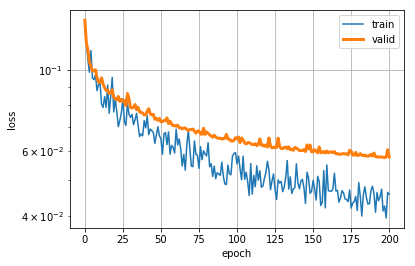

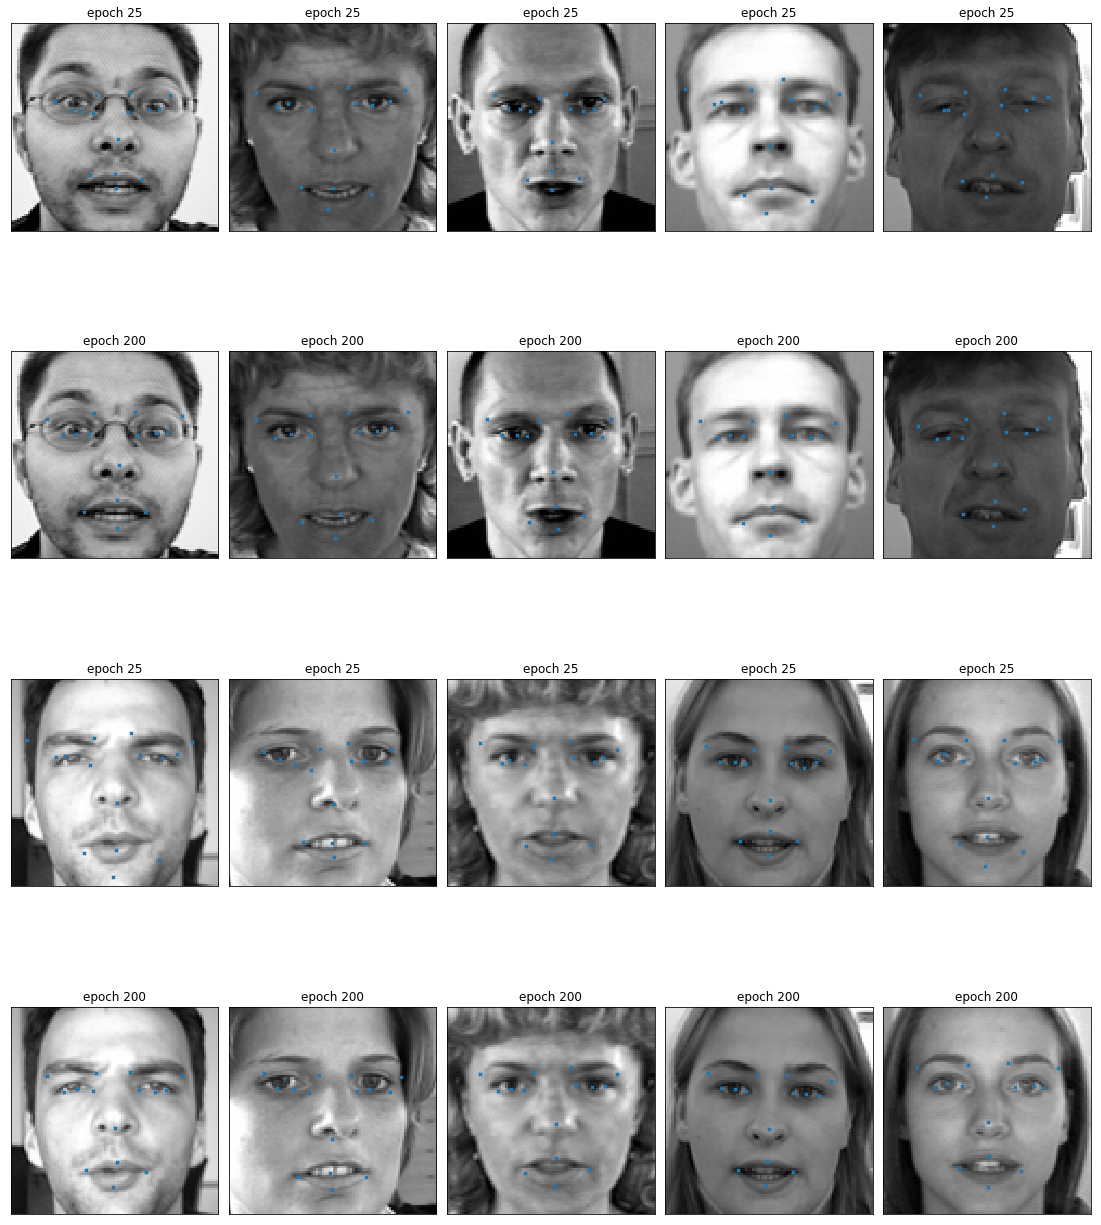

In [87]:
from tensorflow.contrib.layers import fully_connected

tf.reset_default_graph()

n_inputs = Xnp.shape[1]
n_hidden1 = 100
n_hidden2 = 60
n_outputs = 30

X = tf.placeholder(tf.float32,shape = (None,n_inputs),name = 'X')
y = tf.placeholder(tf.float32,shape = (None,n_outputs),name = 'y')

with tf.name_scope('dnn'):
    hidden1 = fully_connected(X,n_hidden1,scope = 'hidden1') #uses default activation function of relu, can be changed.
    #hidden2 = fully_connected(hidden1,n_hidden2,scope = 'hidden2') #took this layer out as we have too few data points to esimtate this many parameters
    pred_keypoints = fully_connected(hidden1,n_outputs,activation_fn = None,scope = 'outputs')
    
    
with tf.name_scope('loss'):
    loss = tf.reduce_mean(np.square(pred_keypoints - y))
    
    
learning_rate = 0.01
momentum = 0.9


with tf.name_scope('train'):
    optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum = momentum) #works better than gradientdescentoptimizer
    training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()

n_epochs = 201
batch_size = 50
train_loss_data = np.zeros((n_epochs,2))
dev_loss_data = np.zeros((n_epochs,2))

time_start = time.time()
time_1000_start = time.time()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        shuffle = np.random.permutation(np.arange(Xnp.shape[0])) #shuffle the training data in each epoch
        Xnp, ynp = Xnp[shuffle], ynp[shuffle]
        for i in range(int(Xnp.shape[0]//batch_size)): #run through most of the data points in each epoch
            X_batch,y_batch = Xnp[i*batch_size:(i+1)*batch_size,:],ynp[i*batch_size:(i+1)*batch_size]
            #print(i,X_batch[1,1],y_batch[1])
            sess.run(training_op,feed_dict = {X:X_batch,y:y_batch})
            loss_train = loss.eval(feed_dict = {X:X_batch,y:y_batch})
            loss_dev = loss.eval(feed_dict = {X:Xdev,y:ydev})
            train_loss_data[epoch,:] = epoch,np.sqrt(loss_train)
            dev_loss_data[epoch,:] = epoch,np.sqrt(loss_dev)
            
        if epoch%10 == 0:
            print(epoch,'Train loss:%0.3f'%np.sqrt(loss_train),'Dev loss:%0.3f'%np.sqrt(loss_dev),'ratio train/dev:%0.2f'%np.sqrt(loss_train/loss_test))
        if epoch == 25:
            y_pred_25 = sess.run(pred_keypoints,feed_dict = {X:X_test})
        elif epoch == 75:    
            y_pred_75 = sess.run(pred_keypoints,feed_dict = {X:X_test})
    time_end = time.time()  
    y_pred = sess.run(pred_keypoints,feed_dict = {X:X_test})
   
    print('Total time taken:',time_end-time_start)
    
#Plot a graph of the train vs test loss data:
    
plt.plot(train_loss_data[:,1], label="train")
plt.plot(dev_loss_data[:,1], linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

#Examine a few test cases to see accuracy of prediction:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

fig = plt.figure(figsize=(15, 18))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(4, 5, i + 1 + 5*int(i/5), xticks=[], yticks=[],title = 'epoch 25')
    plot_sample(X_test[i], y_pred_25[i], ax)
    ax = fig.add_subplot(4,5,i+6+ 5*int(i/5),xticks=[],yticks=[],title = 'epoch 200')
    plot_sample(X_test[i], y_pred[i], ax)

plt.show()